#### $$ \frac{\partial u}{\partial t} - \frac{\partial^2u}{\partial x^2} = 0, \,\, 0<x<2 ,\,\, 0<t $$
#### $$ u(0,t)=u(2,t)=0, \,\, 0<t $$
#### $$ u(x,0)=sin\frac{\pi}{2}x, \,\, 0 \leq x \leq 2$$

#### First, Let $$ u_i^h=u(ik,ih) \,\,, k=\triangle x, h=\triangle t \,\, for\,\, i=1,2,...,n;h=1,2,...,n$$

#### With the change of time, we solve $$[u_1^l\,\,u_2^l\,\,...\,\,u_n^l]^T$$

#### By $$(1-2r)u_i^l+ru_{i+1}^l+ru_{i-1}^l = (1+2r)u_i^{l-1}-ru_{i+1}^{l-1}-ru_{i-1}^l \,\, where \,\, r=-\frac{h}{2k^2}$$

#### we set h=k=0.01

In [119]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd

x_range = (0,2)

# set the hyper-parameter
h=0.01
k=0.01
r=-h/2/k**2

A_size = int((x_range[1]-x_range[0])/h)+1


points = np.linspace(x_range[0],x_range[1],num=int((x_range[1]-x_range[0])/h)+1)
domain = [(i,j) for i in points for j in points]


# set the initial condition
def initialcondition(x):
    return math.sin(math.pi/2*x)

# establish the matrix for this equation
A = [[0 for i in range(A_size)] for j in range(A_size)]

for i in range(A_size):
    for j in range(A_size):
        if i == j:
            A[i][j] = 1-2*r
        elif i == j-1 or i == j+1:
            A[i][j] = r
        else:
            pass

In [111]:
# generate b (nx1 matrix)
def generateb(u_x_0,A_size):
    
    b=[]
    
    for i in range(A_size):
        if i == 0:
            b.append((1+2*r)*u_x_0[i]-r*u_x_0[i+1])
        elif i == A_size-1:
            b.append((1+2*r)*u_x_0[i]-r*u_x_0[i-1])
        else:
            b.append((1+2*r)*u_x_0[i]-r*u_x_0[i+1]-r*u_x_0[i-1])
            
    return b

In [112]:
# set the Thomas algorithm
def Thomas(r,A_size,b):
    a=c=r
    bb=1-2*r
    X = []
    ci = []
    di = []

    for i in range(A_size):
        if i == 0:
            cii = c/bb
            dii = b[0]/bb
            ci.append(cii)
            di.append(dii)
        else:
            cii = c/(bb-a*ci[i-1])
            dii = (b[i]-a*di[i-1])/(bb-a*ci[i-1])
            ci.append(cii)
            di.append(dii)

    for i in range(A_size):
        if i==0:
            X.append(di[A_size-i-1])
        else:
            X.append(di[A_size-i-1]-ci[A_size-i-1]*X[i-1])

    # reorder
    X = [X[-1-i] for i in range(len(X))]
    return X

# check the Thomas algorithm
# import numpy as np
# A = np.array(A)
# B = np.array(b)
# x = np.array(X)
# np.matmul(A,X)-B

In [113]:
for time in range(A_size):
    
    if time == 0:
        
        # we have to update u_x_0 for different time
        u_x_0 = [initialcondition(k*i) for i in range(A_size)]
        
        b = generateb(u_x_0,A_size)
        X = Thomas(r,A_size,b)
        
        # set the network
        sol = [u_x_0]
                
            
    else:
        u_x_0 = X
        
        b = generateb(u_x_0,A_size)
        X = Thomas(r,A_size,b)
        
        sol.append(X)

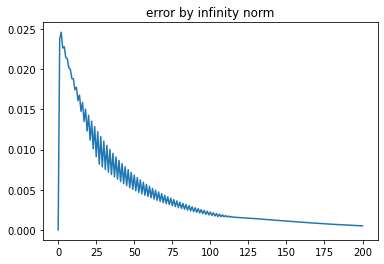

In [114]:
# Comparison
def exact(tx):
    return np.exp(-(np.pi**2/4)*tx[0])*np.sin(np.pi/2*tx[1])

exa=[]
for i in domain:
    exa.append(exact(i))
    
app = []
for i in sol:
    for j in i:
        app.append(j)
        
err = []
err_t = []

for i in range(A_size**2):

    if (i+1)%A_size==0 and i!=0:
        err_t.append(max(err))
        err=[]
        
    else:
        dif = abs(app[i]-exa[i])
        err.append(dif)
        
plt.plot(err_t)
plt.title('error by infinity norm')
plt.show()

In [135]:
df = pd.DataFrame(err_t, columns=['error by $$||\cdot||_\infty$$'])
df.columns.name = 'time'

In [141]:
df.head()

time,error by $$||\cdot||_\infty$$
0,0.000000
1,0.023779
2,0.024586
3,0.022620
4,0.022793


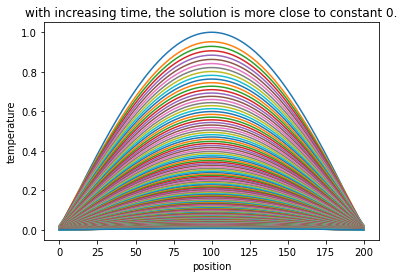

In [117]:
# plot u(x,t)
for i in range(A_size):
    plt.plot(sol[i])
plt.title('with increasing time, the solution is more close to constant 0.')
plt.xlabel('position')
plt.ylabel('temperature')
plt.show()